In [1]:
# Load essential libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import numpy as np
from scipy.signal import butter, lfilter, freqz

from datetime import datetime

In [2]:
# File loading from relative path
file = './Data/20200915-auburn-large-buoy.csv'

### experiment 
* Robotic boat was operated at 0.5m/s for auto mode + manual mode
* Rosbag info 1 h 10 min (14.9GB) -- sonde 4248 msgs ==> sorted out starting and finish time for mission

In [3]:
# Figure initialization
fig = plt.figure()

# Time and robot egomotion
time = []
standardized_time = []
compass_heading = []

# sonde data
temp = []
PH = []
cond = [] # ms
chlorophyll = [] 
ODO = [] # mg/L
sonar = []

<Figure size 432x288 with 0 Axes>

In [4]:
with open(file, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # robot data
        time.append(float(row[0]))
        compass_heading.append(float(row[4]))
        
        # sonde data
        temp.append(float(row[23]))
        PH.append(float(row[26]))
        cond.append(float(row[25]))
        chlorophyll.append(float(row[29]))
        ODO.append(float(row[31]))
        sonar.append(float(row[8]))

    minimum_time = min(time)
    for time_stamp in time:
        standardized_time.append(time_stamp - minimum_time)
    

### Compass heading

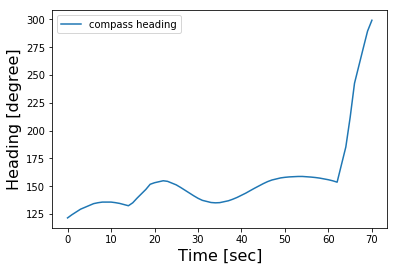

In [5]:
plt.plot(standardized_time, compass_heading, label='compass heading')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Heading [degree]', fontsize=16)
plt.legend()
plt.show()

### Temperature

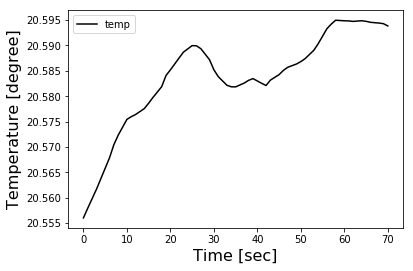

In [6]:
plt.plot(standardized_time, temp, label='temp', color='k')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Temperature [degree]', fontsize=16)
plt.legend()
plt.show()

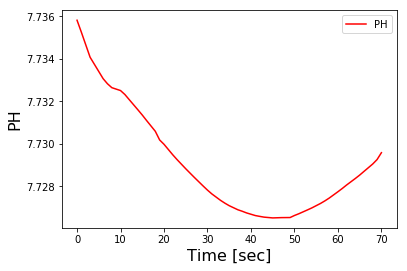

In [7]:
plt.plot(standardized_time, PH, label='PH', color='r')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('PH', fontsize=16)
plt.legend()
plt.show()

### Conductivity
* around time 1000, catabot hit another boat

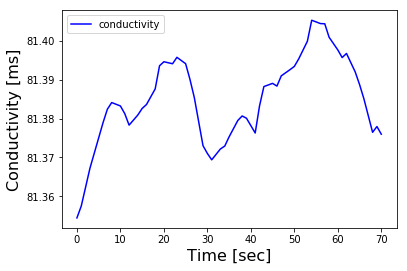

In [8]:
plt.plot(standardized_time, cond, label='conductivity', color='b')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Conductivity [ms]', fontsize=16)
plt.legend()
plt.show()

### Chlorophyll 
* around time 1000, catabot hit another boat

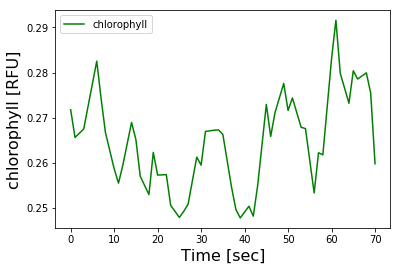

In [9]:
plt.plot(standardized_time, chlorophyll, label='chlorophyll', color='g')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('chlorophyll [RFU]', fontsize=16)
plt.legend()
plt.show()

### ODO

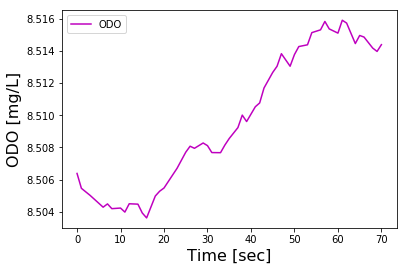

In [10]:
plt.plot(standardized_time, ODO, label='ODO', color='m')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('ODO [mg/L]', fontsize=16)
plt.legend()
plt.show()

### Sonar depth

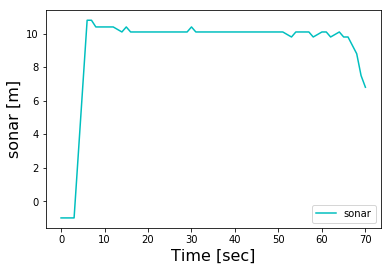

In [11]:
plt.plot(standardized_time, sonar, label='sonar', color='c')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('sonar [m]', fontsize=16)
plt.legend()
plt.show()